In [8]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [9]:
전data300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0300.txt")

# 전 is the Hangul character for the surname Jeon of the data gatherer!
# it's just my linguistics side being quirky and I'm glad Jupyter Notebook supports Hangul characters like this!

dx300 = 전data300[:,4]
# collect the 4th element of each row in the array into a massive array

dy300 = 전data300[:,5]
# collect the 5th element of each row in the array into a massive array

dz300 = 전data300[:,6]
# collect the 6th element of each row in the array into a massive array

In [10]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

#https://book.pythontips.com/en/latest/args_and_kwargs.html
def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    lvl1 = 0.30
    lvl1a = 0.41
    lvl1b = 0.51
    lvl2 = 0.64
    lvl3 = 0.77
    
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl2))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl3))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1a))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1b))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, one_sigma1, one_sigma2, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = [str(lvl1), str(lvl1a), str(lvl1b), str(lvl2), str(lvl3)][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

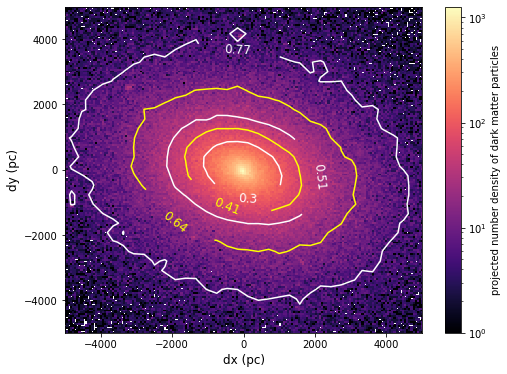

In [11]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx300, dy300, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx300, dy300, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dy (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.savefig("0300_dx_dy.png")

plt.show()

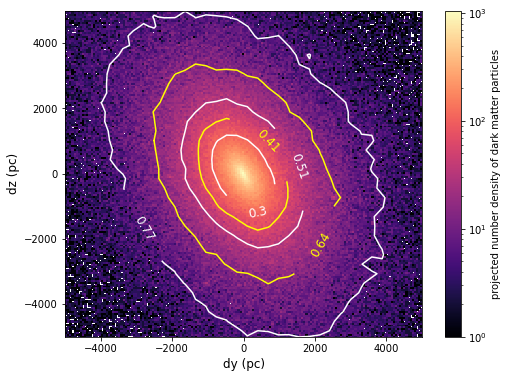

In [12]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dy300, dz300, bins=390, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dy300, dz300, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dy (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.savefig("0300_dy_dz.png")

plt.show()

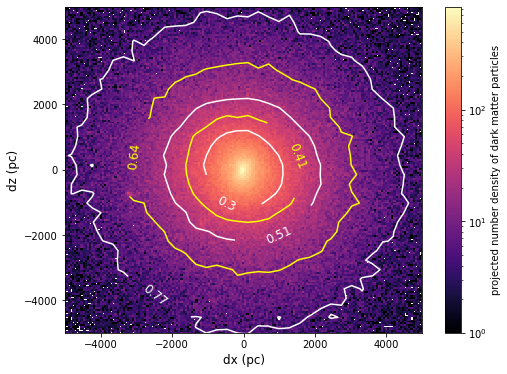

In [13]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx300, dz300, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx300, dz300, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.savefig("0300_dx_dz.png")

plt.show()

In [49]:
'''THIS WORKS WITH 0300'''

r300 = np.sqrt(dx300**2 + dy300**2 + dz300**2) # max: 11700.610641057883, closest to 11710

rad_array300 = np.arange(0, 11710, dr, dtype=np.int64)
density_profile300 = np.zeros(np.size(rad_array300))
i = 0

for radius_value in rad_array300:
    particles = np.where((r300 > radius_value) & (r300 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile300[i] = how_many_particles / shell_volume
    i += 1

In [50]:
dr = 10

In [51]:
'''THIS WORKS WITH 0280'''

전data280 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0280.txt")

dx280 = 전data280[:,4]
dy280 = 전data280[:,5]
dz280 = 전data280[:,6]

r280 = np.sqrt(dx280**2 + dy280**2 + dz280**2) # max: 10873.03722354305, closest to 10880

rad_array280 = np.arange(0, 10880, dr, dtype=np.int64)
density_profile280 = np.zeros(np.size(rad_array280))
i = 0

for radius_value in rad_array280:
    particles = np.where((r280 > radius_value) & (r280 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile280[i] = how_many_particles / shell_volume
    i += 1

In [52]:
'''THIS WORKS WITH 0260'''

전data260 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0260.txt")

dx260 = 전data260[:,4]
dy260 = 전data260[:,5]
dz260 = 전data260[:,6]

r260 = np.sqrt(dx260**2 + dy260**2 + dz260**2) # max: 9736.070358548308, closest to 9740

rad_array260 = np.arange(0, 9740, dr, dtype=np.int64)
density_profile260 = np.zeros(np.size(rad_array260))
i = 0

for radius_value in rad_array260:
    particles = np.where((r260 > radius_value) & (r260 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile260[i] = how_many_particles / shell_volume
    i += 1

In [53]:
'''THIS WORKS WITH 0240'''

전data240 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0240.txt")

dx240 = 전data240[:,4]
dy240 = 전data240[:,5]
dz240 = 전data240[:,6]

r240 = np.sqrt(dx240**2 + dy240**2 + dz240**2) # max: 8463.430201041538, closest to 8470

rad_array240 = np.arange(0, 8470, dr, dtype=np.int64)
density_profile240 = np.zeros(np.size(rad_array240))
i = 0

for radius_value in rad_array240:
    particles = np.where((r240 > radius_value) & (r240 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile240[i] = how_many_particles / shell_volume
    i += 1

In [54]:
'''THIS WORKS WITH 0220'''

전data220 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0220.txt")

dx220 = 전data220[:,4]
dy220 = 전data220[:,5]
dz220 = 전data220[:,6]

r220 = np.sqrt(dx220**2 + dy220**2 + dz220**2) # max: 7069.6147688487945, closest to 7070

rad_array220 = np.arange(0, 7070, dr, dtype=np.int64)
density_profile220 = np.zeros(np.size(rad_array220))
i = 0

for radius_value in rad_array220:
    particles = np.where((r220 > radius_value) & (r220 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile220[i] = how_many_particles / shell_volume
    i += 1

In [55]:
'''THIS WORKS WITH 0200'''

전data200 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0200.txt")

dx200 = 전data200[:,4]
dy200 = 전data200[:,5]
dz200 = 전data200[:,6]

r200 = np.sqrt(dx200**2 + dy200**2 + dz200**2) # max: 5758.806829615749, closest to 5760

rad_array200 = np.arange(0, 5760, dr, dtype=np.int64)
density_profile200 = np.zeros(np.size(rad_array200))
i = 0

for radius_value in rad_array200:
    particles = np.where((r200 > radius_value) & (r200 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile200[i] = how_many_particles / shell_volume
    i += 1

In [56]:
'''THIS WORKS WITH 0180'''

전data180 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0180.txt")

dx180 = 전data180[:,4]
dy180 = 전data180[:,5]
dz180 = 전data180[:,6]

r180 = np.sqrt(dx180**2 + dy180**2 + dz180**2) # max: 4762.8993529580275, closest to 4770

rad_array180 = np.arange(0, 4770, dr, dtype=np.int64)
density_profile180 = np.zeros(np.size(rad_array180))
i = 0

for radius_value in rad_array180:
    particles = np.where((r180 > radius_value) & (r180 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile180[i] = how_many_particles / shell_volume
    i += 1

In [57]:
'''THIS WORKS WITH 0160'''

전data160 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0160.txt")

dx160 = 전data160[:,4]
dy160 = 전data160[:,5]
dz160 = 전data160[:,6]

r160 = np.sqrt(dx160**2 + dy160**2 + dz160**2) # max: 3765.12861331959, closest to 3770

rad_array160 = np.arange(0, 3770, dr, dtype=np.int64)
density_profile160 = np.zeros(np.size(rad_array160))
i = 0

for radius_value in rad_array160:
    particles = np.where((r160 > radius_value) & (r160 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile160[i] = how_many_particles / shell_volume
    i += 1

In [58]:
'''THIS WORKS WITH 0140'''

전data140 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0140.txt")

dx140 = 전data140[:,4]
dy140 = 전data140[:,5]
dz140 = 전data140[:,6]

r140 = np.sqrt(dx140**2 + dy140**2 + dz140**2) # max: 2476.225440569174, closest to 2480

rad_array140 = np.arange(0, 2480, dr, dtype=np.int64)
density_profile140 = np.zeros(np.size(rad_array140))
i = 0

for radius_value in rad_array140:
    particles = np.where((r140 > radius_value) & (r140 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile140[i] = how_many_particles / shell_volume
    i += 1

In [59]:
'''THIS WORKS WITH 0120'''

전data120 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0120.txt")

dx120 = 전data120[:,4]
dy120 = 전data120[:,5]
dz120 = 전data120[:,6]

r120 = np.sqrt(dx120**2 + dy120**2 + dz120**2) # max: 1839.3927923251765, closest to 1840

rad_array120 = np.arange(0, 1840, dr, dtype=np.int64)
density_profile120 = np.zeros(np.size(rad_array120))
i = 0

for radius_value in rad_array120:
    particles = np.where((r120 > radius_value) & (r120 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile120[i] = how_many_particles / shell_volume
    i += 1

In [60]:
'''THIS WORKS WITH 0100'''

전data100 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0100.txt")

dx100 = 전data100[:,4]
dy100 = 전data100[:,5]
dz100 = 전data100[:,6]

r100 = np.sqrt(dx100**2 + dy100**2 + dz100**2) # max: 1216.640092340962, closest to 1220

rad_array100 = np.arange(0, 1220, dr, dtype=np.int64)
density_profile100 = np.zeros(np.size(rad_array100))
i = 0

for radius_value in rad_array100:
    particles = np.where((r100 > radius_value) & (r100 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile100[i] = how_many_particles / shell_volume
    i += 1

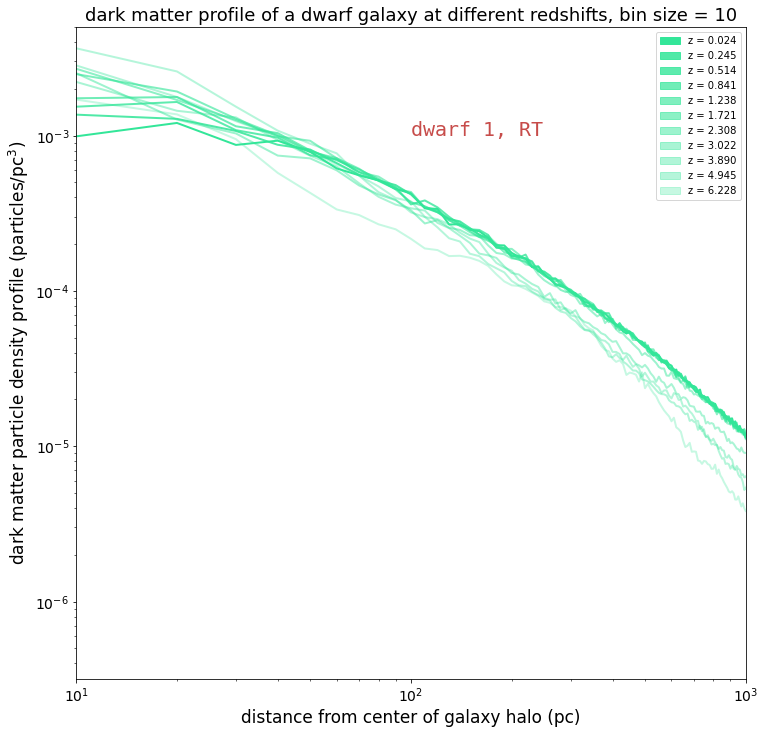

In [68]:
'''OVERPLOT ALL THE 11 .txt FILES!!!!!!!!'''

plt.figure(figsize=(12,12))

plt.plot(rad_array300, density_profile300, color=(0.2, 0.9, 0.6, 1), linewidth=2)
plt.plot(rad_array280, density_profile280, color=(0.2, 0.9, 0.6, 0.86), linewidth=2)
plt.plot(rad_array260, density_profile260, color=(0.2, 0.9, 0.6, 0.79), linewidth=2)
plt.plot(rad_array240, density_profile240, color=(0.2, 0.9, 0.6, 0.70), linewidth=2)
plt.plot(rad_array220, density_profile220, color=(0.2, 0.9, 0.6, 0.62), linewidth=2)
plt.plot(rad_array200, density_profile200, color=(0.2, 0.9, 0.6, 0.56), linewidth=2)
plt.plot(rad_array180, density_profile180, color=(0.2, 0.9, 0.6, 0.48), linewidth=2)
plt.plot(rad_array160, density_profile160, color=(0.2, 0.9, 0.6, 0.42), linewidth=2)
plt.plot(rad_array140, density_profile140, color=(0.2, 0.9, 0.6, 0.38), linewidth=2)
plt.plot(rad_array120, density_profile120, color=(0.2, 0.9, 0.6, 0.36), linewidth=2)
plt.plot(rad_array100, density_profile100, color=(0.2, 0.9, 0.6, 0.28), linewidth=2)

purple11 = mpatches.Patch(color=(0.2, 0.9, 0.6, 1), label='z = 0.024')
purple10 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.86), label='z = 0.245')
purple9 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.79), label='z = 0.514')
purple8 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.70), label='z = 0.841')
purple7 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.62), label='z = 1.238')
purple6 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.56), label='z = 1.721')
purple5 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.48), label='z = 2.308')
purple4 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.42), label='z = 3.022')
purple3 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.38), label='z = 3.890')
purple2 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.36), label='z = 4.945')
purple1 = mpatches.Patch(color=(0.2, 0.9, 0.6, 0.28), label='z = 6.228')

plt.legend(handles=[purple11, purple10, purple9, purple8, purple7, \
                    purple6, purple5, purple4, purple3, purple2, purple1])

plt.xlabel('distance from center of galaxy halo (pc)', fontsize=17)
plt.ylabel(r'dark matter particle density profile (particles/pc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10,10**3)
plt.ylim(10**-6.5,10**-2.3) 
plt.xscale('log')
plt.yscale('log')

plt.title('dark matter profile of a dwarf galaxy at different redshifts, bin size = ' + str(dr), \
          loc='center', fontsize=18)
plt.text(10**2, 10**-3, 'dwarf 1, RT', fontsize=20, color='#C74C4A', fontfamily='monospace')

plt.show()